# Credit Card Fraud Detection using Machine Learning and Data Science

 It is vital that credit card companies are able to
identify fraudulent credit card transactions so that customers
are not charged for items that they did not purchase. Such
problems can be tackled with Data Science and its importance,
along with Machine Learning, cannot be overstated. This
project intends to illustrate the modelling of a data set using
machine learning with Credit Card Fraud Detection. The Credit
Card Fraud Detection Problem includes modelling past credit
card transactions with the data of the ones that turned out to be
fraud. This model is then used to recognize whether a new
transaction is fraudulent or not.
'Fraud' in credit card transactions is unauthorized and
unwanted usage of an account by someone other than the
owner of that account. Necessary prevention measures can be
taken to stop this abuse and the behaviour of such fraudulent
practices can be studied to minimize it and protect against
similar occurrences in the future.In other words, Credit Card
Fraud can be defined as a case where a person uses someone
else’s credit card for personal reasons while the owner and the
card issuing authorities are unaware of the fact that the card is
being used.
Fraud detection involves monitoring the activities of
populations of users in order to estimate, perceive or avoid
objectionable behaviour, which consist of fraud, intrusion, and
defaulting.

'Fraud' in credit card transactions is unauthorized and
unwanted usage of an account by someone other than the
owner of that account. Necessary prevention measures can be
taken to stop this abuse and the behaviour of such fraudulent
practices can be studied to minimize it and protect against
similar occurrences in the future.In other words, Credit Card
Fraud can be defined as a case where a person uses someone
else’s credit card for personal reasons while the owner and the
card issuing authorities are unaware of the fact that the card is
being used.
Fraud detection involves monitoring the activities of
populations of users in order to estimate, perceive or avoid
objectionable behaviour, which consist of fraud, intrusion, and
defaulting.

Fraud detection methods are continuously developed to defend
criminals in adapting to their fraudulent strategies. These
frauds are classified as:
* Credit Card Frauds: Online and Offline
* Card Theft
* Account Bankruptcy
* Device Intrusion
* Application Fraud
* Counterfeit Card
* Telecommunication Fraud

#### METHODOLOGY

The approach we will use is the latest machine learning algorithms to detect anomalous activities, called
Outliers. Then, we obtain our dataset and We plot different graphs to check for inconsistencies in the dataset and to visually comprehend it.
First of all, we obtained our dataset from Kaggle, a data Analysis website which provides datasets. Inside this dataset, there are 12 columns. 


Importing dataset, libraries & getting familiar with data 

In [73]:
# The code was removed by Watson Studio for sharing.

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [74]:
# Import libraries 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest


In [75]:
df_data_1.shape

(3075, 12)

We have 3075 rows and 12 coloumns

In [76]:
# Columns

df_data_1.columns

Index(['Merchant_id', 'Transaction date', 'Average Amount/transaction/day',
       'Transaction_amount', 'Is declined', 'Total Number of declines/day',
       'isForeignTransaction', 'isHighRiskCountry', 'Daily_chargeback_avg_amt',
       '6_month_avg_chbk_amt', '6-month_chbk_freq', 'isFradulent'],
      dtype='object')

In [77]:
# Missing values 

df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [78]:
# data types 

df_data_1.value_counts()

Series([], dtype: int64)

From the cell at the top, we notice that the column has no data, and therefore the column is not important in the data set, and thus the column will be removed

In [79]:
df_data_1.drop(['Transaction date'], axis=1, inplace=True)
df_data_1.head()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [80]:
df_data_1.shape

(3075, 11)

Visualize Qualitative Variables

In [81]:
for col in df_data_1.select_dtypes("object"):
    print(col)

Is declined
isForeignTransaction
isHighRiskCountry
isFradulent


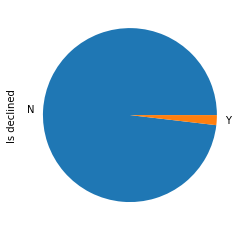

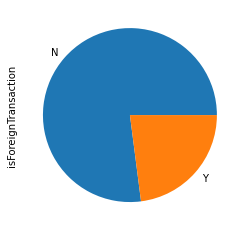

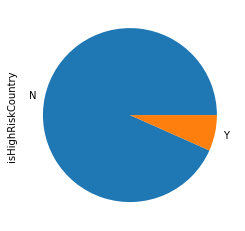

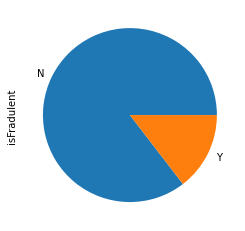

In [82]:
for col in df_data_1.select_dtypes("object"):
    plt.figure()
    df_data_1[col].value_counts(normalize=True).plot.pie()

From the pie chartes on the top we notice that the vlaue "No" has taken the most part of the pie, which indectes that there is not much threat in the transactions 

Visualize Quantitative Variables 

In [83]:
for col in df_data_1.select_dtypes("float"):
    print(col)

Average Amount/transaction/day
Transaction_amount
6_month_avg_chbk_amt


Since we are dealing with quanitative data we have to apply a statistical analysis to get a better understanding

In [84]:
df_data_1.describe()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


In [85]:
for col in df_data_1.select_dtypes("int64"):
    print(col)

Merchant_id
Total Number of declines/day
Daily_chargeback_avg_amt
6-month_chbk_freq


Applying encoding for qualitative variables 

In [86]:
code = {"N":0,
        "Y":1
       }

In [87]:
for obj in df_data_1.select_dtypes("object"):
    df_data_1[obj] = df_data_1[obj].map(code)

In [88]:
# Calculate Correlation 
df_data_1.corr()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
Merchant_id,1.000000,0.018223,0.046065,0.159211,-0.016165,0.030289,0.028611,0.088802,0.091621,0.118599,0.043068
Average Amount/transaction/day,0.018223,1.000000,0.587111,0.081184,-0.009682,0.047316,0.014604,0.060429,0.060284,0.071849,0.023504
Transaction_amount,0.046065,0.587111,1.000000,0.197009,0.259309,0.276764,0.325397,0.252298,0.259663,0.297623,0.528913
Is declined,0.159211,0.081184,0.197009,1.000000,0.115961,0.079761,0.127586,0.394083,0.407917,0.499365,0.271282
Total Number of declines/day,-0.016165,-0.009682,0.259309,0.115961,1.000000,0.227904,0.292459,0.094834,0.081138,0.085028,0.531990
isForeignTransaction,0.030289,0.047316,0.276764,0.079761,0.227904,1.000000,0.489572,0.054798,0.060566,0.077083,0.478113
isHighRiskCountry,0.028611,0.014604,0.325397,0.127586,0.292459,0.489572,1.000000,0.074902,0.073167,0.098241,0.639792
Daily_chargeback_avg_amt,0.088802,0.060429,0.252298,0.394083,0.094834,0.054798,0.074902,1.000000,0.953663,0.884611,0.385964
6_month_avg_chbk_amt,0.091621,0.060284,0.259663,0.407917,0.081138,0.060566,0.073167,0.953663,1.000000,0.851339,0.375758
6-month_chbk_freq,0.118599,0.071849,0.297623,0.499365,0.085028,0.077083,0.098241,0.884611,0.851339,1.000000,0.443824


View correlation

<AxesSubplot:>

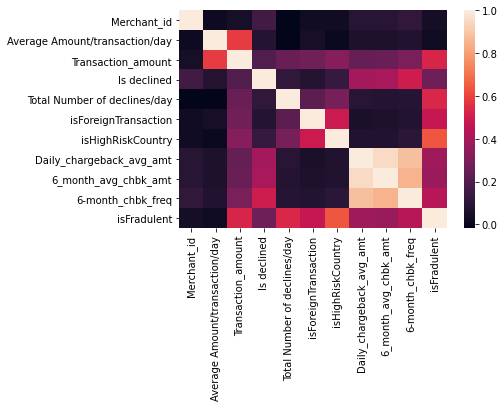

In [89]:
plt.figure()
sns.heatmap(df_data_1.corr())

After checking this dataset, we plot a pie chart and histogram for every column dependent on the data type. This is done to get a graphical representation of the dataset which can be used to verify that there are no missing any values in the dataset. This is done to ensure that we don’t require any missing value imputation and the machine learning algorithms can process the dataset smoothly. After this analysis, we plot a graphs to get a colored representation of the data and to study the correlation between out predicting variables and the class variable. 

## Applying Machine Learning to the dataset

The dataset is now formatted and processed. The time and
amount column are standardized and the Class column is
removed to ensure fairness of evaluation. The data is
processed by a set of algorithms from modules. The following
module diagram explains how these algorithms work together:
This data is fit into a model and the following outlier detection
modules are applied on it:
* Train Test Split
* Confusion Matrix


Detailed explanations about the modules with pseudocodes for
their algorithms and output graphs are given as follows:


**Preprocessing Sklearn modules**

In [90]:
from sklearn.model_selection import train_test_split

**Create trainset and testset**

In [91]:
trainset,testset=train_test_split(df_data_1,test_size=0.2,random_state=0)

**Create X_train, y_train, X_test, y_test**

In [94]:
def prepro(df):
    X=df_data_1.drop(["isFradulent"],axis=1)
    y=df_data_1["isFradulent"]
    return X,y

In [96]:
X_train,y_train=prepro(trainset)
X_test,y_test=prepro(testset)

In [97]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,Normalizer,PolynomialFeatures
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [98]:
svc=make_pipeline(StandardScaler(),SVC())

**Evaluation Model**

In [99]:
def evalu(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print("confusion matrix",confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    N,train_score,val_score=learning_curve(model,X_train,y_train,scoring="f1",train_sizes=np.linspace(0.1,1,10),cv=5)
    plt.figure()
    plt.plot(N,train_score.mean(axis=1),label="train_score")
    plt.plot(N,val_score.mean(axis=1),label="validation_score")
    plt.legend()

confusion matrix [[2615   12]
 [  23  425]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2627
           1       0.97      0.95      0.96       448

    accuracy                           0.99      3075
   macro avg       0.98      0.97      0.98      3075
weighted avg       0.99      0.99      0.99      3075



/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/svm/_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/svm/_base.py", line 549, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn

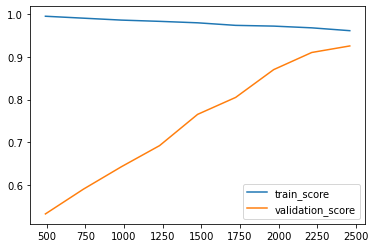

In [100]:
evalu(svc)

**Evaluate Other Models**

In [102]:
knn=make_pipeline(StandardScaler(),KNeighborsClassifier())
dt=make_pipeline(StandardScaler(),DecisionTreeClassifier())

confusion matrix [[2607   20]
 [  26  422]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2627
           1       0.95      0.94      0.95       448

    accuracy                           0.99      3075
   macro avg       0.97      0.97      0.97      3075
weighted avg       0.98      0.99      0.98      3075



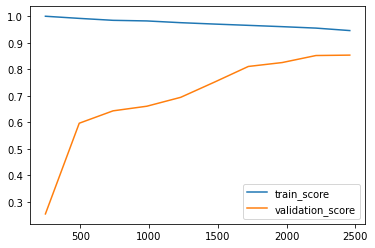

In [103]:
evalu(knn)

**Decision Tree**

confusion matrix [[2627    0]
 [   0  448]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2627
           1       1.00      1.00      1.00       448

    accuracy                           1.00      3075
   macro avg       1.00      1.00      1.00      3075
weighted avg       1.00      1.00      1.00      3075



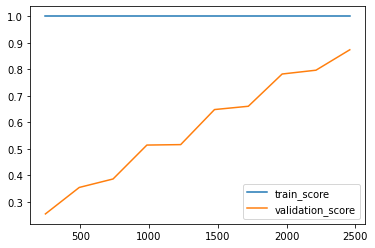

In [104]:
evalu(dt)

According to the modles above we decide to go with SVC

In [105]:
svc

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [106]:
param={
    "svc__C":[1.0,2.0,5.0,40.0,632.0],
    "svc__gamma":[1e-4,1e-5]
}

In [107]:
grid=GridSearchCV(svc,param,scoring="recall",cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'svc__C': 632.0, 'svc__gamma': 0.0001}


confusion matrix [[2616   11]
 [  19  429]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2627
           1       0.97      0.96      0.97       448

    accuracy                           0.99      3075
   macro avg       0.98      0.98      0.98      3075
weighted avg       0.99      0.99      0.99      3075



/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/svm/_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/svm/_base.py", line 549, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn

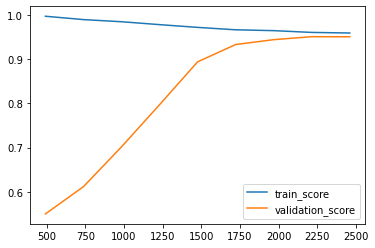

In [108]:
evalu(grid.best_estimator_)

**Model Final Score**

In [109]:
grid.best_estimator_.score(X_test,y_test)

0.9902439024390244